<a href="https://colab.research.google.com/github/TomokazuHonda/data-analysis-basic-kadai/blob/main/11%E7%AB%A0_%E5%9B%9E%E5%B8%B0%E3%81%AE%E6%89%8B%E6%B3%95%E3%82%92%E5%AD%A6%E3%81%BC%E3%81%86_%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E3%83%95%E3%82%A9%E3%83%AC%E3%82%B9%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 76.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6e7386176d015e886e2189c3f1b05b3c6ed6bf6ec244f8d6676d6ca0863312ef
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

In [ ]:
df = pd.read_csv('/content/california_housing_cleansing.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [ ]:
# 説明変数の定義
X = df.drop(columns=['住宅価格']).to_numpy()
# 目的変数の定義
y = df['住宅価格'].to_numpy()

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#標準化関連のクラスのインポート
from sklearn.preprocessing import StandardScaler

In [ ]:
#インスタンス化
scaler = StandardScaler()

In [ ]:
#標準化する変換モデル生成(★学習データを用いて変換モデルを生成)
#補足① 説明変数のテストデータを利用しない。未知のデータの予測と同条件で行うため？
scaler.fit(X_train)

StandardScaler()

In [ ]:
#標準化の変換モデルでスケールの変換(学習データ)
X_train_scaled = scaler.transform(X_train)

In [ ]:
#学習データの変換前
df_X_train = pd.DataFrame(X_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,3.7500,29.0,1390.0,34.04,-117.98,1.056115,0.223022
1,3.1187,25.0,588.0,33.01,-117.07,3.605442,0.647959
2,4.6406,45.0,1180.0,33.90,-118.07,1.505085,0.299153
3,5.9010,18.0,2882.0,34.33,-118.43,2.044067,0.319223
4,2.6167,42.0,1271.0,37.99,-122.34,1.204563,0.256491


In [ ]:
#学習データの変換後
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,0.034653,0.178247,-0.075532,-0.723337,0.760166,-0.837592,-0.809192
1,-0.368102,-0.170455,-0.767887,-1.203976,1.220266,1.614325,1.182965
2,0.602835,1.573057,-0.256822,-0.788667,0.714662,-0.405778,-0.452281
3,1.406941,-0.780684,1.212489,-0.588012,0.532645,0.112610,-0.358190
4,-0.688367,1.311530,-0.178263,1.119887,-1.444266,-0.694816,-0.652284


In [ ]:
#学習データの各要素確認((平均値0、標準偏差1に標準化)
df_X_train_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.533263e-15,7.651999e-17,8.280556e-17,-3.489093e-14,-8.354643e-14,1.134163e-14,-1.848504e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-2.420081e+00,-1.850904e+00,-1.851601e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-1.034727e+00,-4.232155e-01,-3.998158e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,5.225325e-01,-2.454245e-02,-1.384252e-01
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,7.652223e-01,2.989548e-01,1.855580e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,2.615732e+00,3.790064e+01,3.916628e+01


In [ ]:
#標準化の変換モデルでスケールの変換(テストデータ)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#テストデータの変換前
df_X_test = pd.DataFrame(X_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,2.9628,36.0,2388.0,34.13,-117.27,1.397404,0.287688
1,2.2279,37.0,72.0,37.65,-120.95,1.888889,0.277778
2,4.5781,9.0,2235.0,33.18,-117.26,2.031320,0.354810
3,5.5209,35.0,1052.0,34.22,-118.52,1.539924,0.258555
4,2.2361,46.0,101.0,38.02,-121.82,1.742574,0.425743


In [ ]:
#テストデータの変換後
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
0,-0.467563,0.788477,0.786026,-0.681340,1.119145,-0.509344,-0.506026
1,-0.936412,0.875652,-1.213342,0.961229,-0.741477,-0.036639,-0.552489
2,0.562961,-1.565265,0.653943,-1.124647,1.124201,0.100350,-0.191353
3,1.164446,0.701301,-0.367323,-0.639342,0.487140,-0.372270,-0.642607
4,-0.931181,1.660233,-1.188306,1.133886,-1.181352,-0.177363,0.141187


In [ ]:
#テストデータの各要素確認(平均値0、標準偏差1から少し乖離)
#★理由は学習データを標準化するモデルでスケール変換したため
df_X_test_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数,寝室数
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,-0.005149,0.008292,-0.020433,0.004869,-0.002439,0.030341,0.037607
std,1.005489,0.988514,1.012970,1.007327,1.005098,1.245476,1.404714
min,-2.038837,-2.175494,-1.272908,-1.423296,-2.435249,-1.752933,-1.772656
25%,-0.748863,-0.780684,-0.583144,-0.784000,-1.065063,-0.407443,-0.380380
50%,-0.154763,0.003896,-0.253369,-0.630010,0.517476,-0.011944,-0.123381
75%,0.592882,0.788477,0.258559,0.965896,0.765222,0.303824,0.197324
max,7.211958,2.096111,23.385096,2.967777,2.534835,51.258832,64.690468


In [ ]:
#予測モデルの学習
#サイキットラーンからランダムフォレストを使用
#ランダムフォレスト：目的変数を説明変数から予測手法→ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

model = RandomForestRegressor()

In [ ]:
#説明変数:スケール変換後学習データ、目的変数:学習データで学習する
model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
#予測モデル評価

In [ ]:
#スケール変換済学習データでランダムフォレストを評価
model.score(X_train_scaled,y_train)

0.9690155606048676

In [ ]:
#スケール変換済テストデータでランダムフォレストを評価
#学習データとテストデータで乖離？過学習？
model.score(X_test_scaled,y_test)

0.7873125443532599

In [ ]:
#予測

In [ ]:
#データを変数に保持
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

In [ ]:
#X_newをスケール変換
#予測モデルはスケール変換済説明変数から目的変数を予測するため
X_new_scaled = scaler.transform(X_new)
X_new_scaled

array([[ 2.74605512,  1.22435471, -0.84385579,  0.65791393, -0.26115327,
        -0.8915631 , -0.91712007],
       [-1.08180733, -1.4780894 ,  0.45107143,  1.1245529 , -1.27236074,
        -0.41066806,  0.48931492],
       [-1.71978441, -0.17045515, -0.41221338,  1.1245529 , -0.76675701,
         0.07022698,  2.83337325]])

In [ ]:
#X_newから住宅価格を予測
model.predict(X_new_scaled)

array([3.66533, 1.2407 , 1.1492 ])

In [ ]:
#住宅価格を予測する計算式を作成

In [ ]:
# 予測？？
y_pred = model.predict(X)
y_pred

array([3.65971, 3.65689, 3.48673, ..., 3.68459, 3.6297 , 3.47374])

In [ ]:
# R²スコア（精度評価）　？？
score = model.score(X, y)
print("R²スコア:", score)


R²スコア: -3.498605439674022


/tmp/ipython-input-3486509075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='重要度', y='特徴量', data=importance_df, palette='viridis')


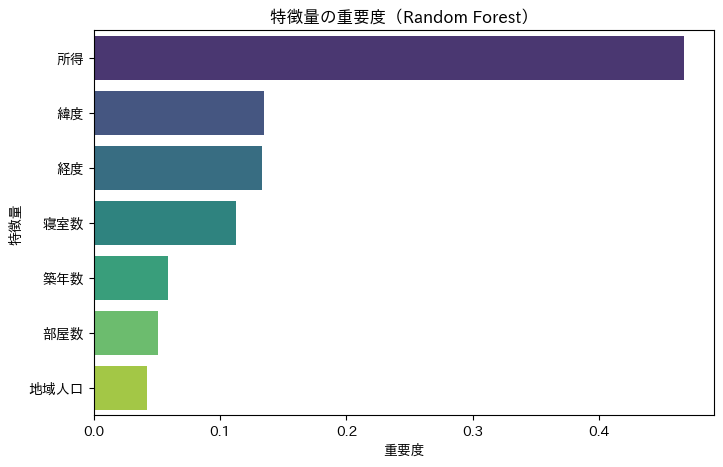

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 特徴量名と重要度
feature_names = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数']
importance = model.feature_importances_

# データフレーム化
importance_df = pd.DataFrame({
    '特徴量': feature_names,
    '重要度': importance
}).sort_values(by='重要度', ascending=False)

# 可視化
plt.figure(figsize=(8, 5))
sns.barplot(x='重要度', y='特徴量', data=importance_df, palette='viridis')
plt.title('特徴量の重要度（Random Forest）')
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.show()



In [ ]:
#ランダムフォレストは、式を作らないのか？

In [ ]:
#